<a href="https://colab.research.google.com/github/sprintgithub/Testgithub/blob/master/HandsOn7_2020Deep_Learning_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Hands-on - Deep Learning for Intracranial Hemorrhage Detection



**Developed by:**

Luciano M. Prevedello, MD, MPH (luciano.prevedello@osumc.edu)

Felipe Campos Kitamura, MD, MSc (kitamura.felipe@gmail.com)

Igor Santos, MD (igor.msantos@fidi.org.br)

### In conjunction with the SIIM 2019 Annual Meeting



**Step by step:**

All the process will be demonstrated with **Python 3** running on **Google Colaboratory**. Please make sure you have GPU enabled under notebook settings before you proceed.


For each task we will import specific libraries.

##Dataset Download



In [ ]:
#Installing dependencies

!pip3 install keras-vis
!pip3 install imgaug==0.2.5
!pip3 install scipy==1.2.1

print ('\033[1m' + 'Finished! Go to next step.')

     |████████████████████████████████| 563kB 3.4MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp36-none-any.whl size=561439 sha256=982b18890f2d7ad9516e8bcb0758d8e15e2984239e5637f985dd97147e35911c
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 24.8MB 128kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.1 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
Finished! Go to next step.


In [ ]:
#First of all, we are going to download the zip files with the images to this instance of Google's Colaboratory

!wget https://github.com/kitamura-felipe/deeplearning_head_ct_demo/blob/master/Allcases.zip?raw=true 
!wget https://github.com/kitamura-felipe/deeplearning_head_ct_demo/blob/master/33_33.zip?raw=true
!wget https://github.com/kitamura-felipe/deeplearning_head_ct_demo/blob/master/60_6.zip?raw=true
  
print ('\033[1m' + 'Ready for next step!')

--2020-07-21 01:52:05--  https://github.com/kitamura-felipe/deeplearning_head_ct_demo/blob/master/Allcases.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/kitamura-felipe/deeplearning_head_ct_demo/raw/master/Allcases.zip [following]
--2020-07-21 01:52:06--  https://github.com/kitamura-felipe/deeplearning_head_ct_demo/raw/master/Allcases.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kitamura-felipe/deeplearning_head_ct_demo/master/Allcases.zip [following]
--2020-07-21 01:52:06--  https://raw.githubusercontent.com/kitamura-felipe/deeplearning_head_ct_demo/master/Allcases.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.co

In [ ]:
#Let's unzip them

!unzip Allcases.zip?raw=true -d /
!unzip 33_33.zip?raw=true -d /
!unzip 60_6.zip?raw=true -d /

print ('\033[1m' + 'Ready for next step!')

Archive:  Allcases.zip?raw=true
   creating: /All cases/Test/
   creating: /All cases/Test/Hematoma/
  inflating: /All cases/Test/Hematoma/Test hematoma (1).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (10).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (11).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (12).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (13).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (14).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (15).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (16).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (17).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (18).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (19).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (2).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (20).png  
  inflating: /All cases/Test/Hematoma/Test hematoma (3).png  
  inflating: /All ca

##Experiment 1


### 1.1 - Preprocessing

Data Aug Off
Training set:
Found 66 images belonging to 2 classes.
Validation set:
Found 22 images belonging to 2 classes.
Test set:
Found 22 images belonging to 2 classes.


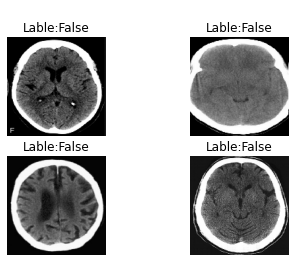

Ready for next step!


In [ ]:
# Importing libraries for arrays (NumPy), Pre-processing (Keras) and plotting images (Matplotlib)

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow

# It is important to set a random seed in order to have reproducbility of training results between different users

from numpy.random import seed
seed(123)
#from tensorflow import set_random_seed
#set_random_seed(123)
tensorflow.random.set_seed(123)

import warnings
warnings.filterwarnings('ignore')

# Dimensions which our images will be resized for the input. All of them must have the same size

img_width, img_height = 150, 150

# We split the data between 60/10/30% for training/validation/test sets 
# We choose which directories must be used

validation_data_dir = '/All cases/Validation/'
nb_validation_samples = 40

test_data_dir = '/All cases/Test/'
nb_test_samples = 40

dataset = 0

if dataset == 0:
  train_data_dir = '/60+6/Training/'
  nb_train_samples = 66
  test_data_dir = '/60+6/Test/'
  nb_test_samples = 40
  validation_data_dir = '/60+6/Validation/'
  nb_validation_samples = 40
elif dataset == 1:
  train_data_dir = '/33+33/Training/'
  nb_train_samples = 66
else:
  train_data_dir = '/All cases/Training/'
  nb_train_samples = 120


# For generator we need to give these two hyperparameters
epochs = 40
batch_size = 5


# This is the augmentation configuration we will use for training
dataaug = 0

if dataaug == 0:
  print("Data Aug Off")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255) # normalization
elif dataaug == 2:
  print("Data Aug ON 2")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=1.0,
      height_shift_range=1.0,
      shear_range=0.2,
      zoom_range=1.0,
      rotation_range=90,
      horizontal_flip=True)  
else:
  print("Data Aug ON 1")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.02,
      zoom_range=0.05, 
      rotation_range=10,
      horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

test_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

print("Training set:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Validation set:")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Test set:")
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary', shuffle = False)

# Let's plot the first 4 generator outputs, defining the positive cases as Label = True and negatives as Label = False 

x,y = train_generator.next()
labley = y==0
for i in range(0, 4):
 plt.subplot(220 + 1 + i).grid(False)
 plt.imshow(x[i], cmap=plt.get_cmap('gray'))
 plt.title("\nLable:{}".format(labley[i]))
 plt.axis('off')

# show the plot
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 1.2 - Model Compilation

In [ ]:
# Now we import keras modules for creating a linear stack of layer (Sequential)
# Then we import the specific layers we want to use in our model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K

# We define the size of the input of the Neural Net

img_width, img_height = 150, 150

# we could use 1 color channel instead of 3
# we are using 3 channels for simplifying transfer learning implementation

input_shape = (img_width, img_height, 3) # width, height, # of color channels

SIIM_custom_model = Sequential()

# Below we have the first Convolutional Layer

SIIM_custom_model.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))

# We then add a MaxPool layer, which will reduce the size of the output of the first conv layer in 75%.
# This is performed to avoid an exagerated increase in the number of parameters of the network.
# Don't worry if you do not understand in detail each one of these operations right now. Try to focus on the big picture.

SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))

# We will add more convolutional layers, followed by MaxPool layers

SIIM_custom_model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))

SIIM_custom_model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))


# Finally, we will add two dense layers, or 'Fully Connected Layers'.
# These layers are classical neural nets, without convolutions.

SIIM_custom_model.add(Flatten())
SIIM_custom_model.add(Dense(32, kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))

# Dropout is an overfitting reduction technique.

SIIM_custom_model.add(Dropout(0.2))

# Now, we will set the output o the network.
# The Dense function has the argument "1" because the net output is the hematoma x non-hematoma classification

SIIM_custom_model.add(Dense(1))

# The output is either 0 or 1 and this can be obtained with a sigmoid function.

SIIM_custom_model.add(Activation('sigmoid'))

# Let's compile the network.

SIIM_custom_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


### 1.3 - Training and Validation

In [ ]:
# Now, let's train our SIIM Neural Net:

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='best_SIIM_custom_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

hist = SIIM_custom_model.fit_generator(
    train_generator,
    steps_per_epoch= 120 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[checkpointer])

print ('\033[1m' + 'Ready for next step!')

Epoch 1/40
24/24 [==============================] - 7s 301ms/step - loss: 0.5455 - accuracy: 0.8839 - val_loss: 0.0173 - val_accuracy: 0.9459

Epoch 00001: val_loss improved from inf to 0.01731, saving model to best_SIIM_custom_model.hdf5
Epoch 2/40
24/24 [==============================] - 1s 48ms/step - loss: 0.4101 - accuracy: 0.8966 - val_loss: 0.5799 - val_accuracy: 0.8529

Epoch 00002: val_loss did not improve from 0.01731
Epoch 3/40
24/24 [==============================] - 1s 45ms/step - loss: 0.2799 - accuracy: 0.9107 - val_loss: 0.0735 - val_accuracy: 0.9189

Epoch 00003: val_loss did not improve from 0.01731
Epoch 4/40
24/24 [==============================] - 1s 36ms/step - loss: 0.2395 - accuracy: 0.9196 - val_loss: 0.6336 - val_accuracy: 0.8824

Epoch 00004: val_loss did not improve from 0.01731
Epoch 5/40
24/24 [==============================] - 1s 42ms/step - loss: 0.1991 - accuracy: 0.9018 - val_loss: 0.0271 - val_accuracy: 0.9412

Epoch 00005: val_loss did not improve fr

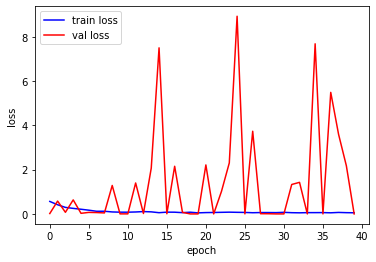

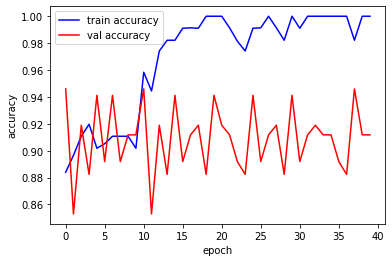

Best Validation Accuracy: 0.9411764740943909
  
Ready for next step!


In [ ]:
# Plotting the loss function

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(hist.history['accuracy'], 'b-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r-', label='val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

print('\033[1m' + "Best Validation Accuracy: " + str(hist.history['val_accuracy'][np.argmin(hist.history['val_loss'])]))
print("  ")
print ('\033[1m' + 'Ready for next step!')

### 1.4 - Performance Metrics

In [ ]:
from keras.models import load_model

# Loading the best model

best_model = load_model('best_SIIM_custom_model.hdf5')

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


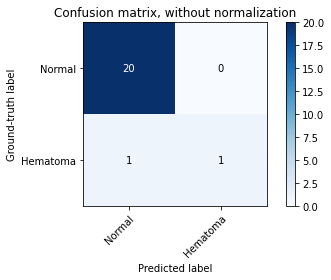

In [ ]:
# Defining a function to plot a confusion matrix.

# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  
X, Y = test_generator.next() # Get the X (images) and Y (labels) of the test set

labels_pred = 1 - best_model.predict(X) #predict the output from X

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

labels_test =  Y==0

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['Normal','Hematoma'], normalize=False,
                      title='Confusion matrix, without normalization')

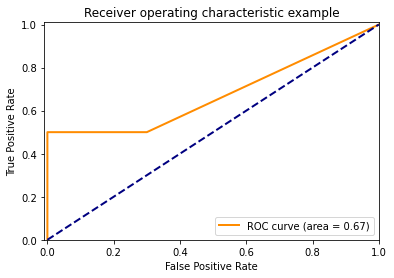

Accuracy: 0.9545454545454546
F1 Score: 0.6666666666666666


In [ ]:
#Plotting the ROC curve with the AUC

labels_pred = 1 - best_model.predict(X) # predict again to get the original sigmoid output [0,1]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

f1_score = metrics.f1_score(labels_test, labels_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

accuracy = metrics.accuracy_score(labels_test, labels_pred)

print("Accuracy: " + str(accuracy))

print("F1 Score: " + str(f1_score))

#**There are 3 Training Sets:**

#- Dataset 0 comprises 60 normal and 6 hemorrhage head CT images.

- Dataset 1 comprises 33 normal and 33 hemorrhage head CT images.
 In conjunction with the SIIM 2019 Annual Meeting

- Dataset 2 comprises 60 normal and 60 hemorrhage head CT images.

Validation and Test sets have 20 normal and 20 hemorrhage each, except for dataset 0 (20 normal and 2 hemorrhages).

##Experiment 2

In [ ]:
#reset runtimes

import os
os.kill(os.getpid(), 9)

### 2.1 Preprocessing

Data Aug Off
Training set:
Found 66 images belonging to 2 classes.
Validation set:
Found 40 images belonging to 2 classes.
Test set:
Found 40 images belonging to 2 classes.


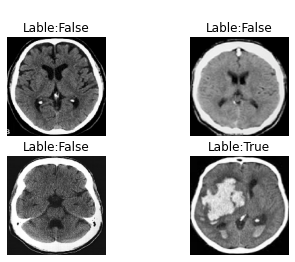

Ready for next step!


In [ ]:
# Importing libraries for arrays (NumPy), Pre-processing (Keras) and plotting images (Matplotlib)

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow


# It is important to set a random seed in order to have reproducbility of training results between different users

from numpy.random import seed
seed(123)
#from tensorflow import set_random_seed
#set_random_seed(123)
from numpy.random import seed
seed(123)
tensorflow.random.set_seed(123)

import warnings
warnings.filterwarnings('ignore')

# Dimensions which our images will be resized for the input. All of them must have the same size

img_width, img_height = 150, 150

# We split the data between 60/10/30% for training/validation/test sets 
# We choose which directories must be used

validation_data_dir = '/All cases/Validation/'
nb_validation_samples = 40

test_data_dir = '/All cases/Test/'
nb_test_samples = 40

dataset = 1

if dataset == 0:
  train_data_dir = '/60+6/Training/'
  nb_train_samples = 66
  test_data_dir = '/60+6/Test/'
  nb_test_samples = 40
  validation_data_dir = '/60+6/Validation/'
  nb_validation_samples = 40
elif dataset == 1:
  train_data_dir = '/33+33/Training/'
  nb_train_samples = 66
else:
  train_data_dir = '/All cases/Training/'
  nb_train_samples = 120


# For generator we need to give these two hyperparameters
epochs = 40
batch_size = 5


# This is the augmentation configuration we will use for training
dataaug = 0

if dataaug == 0:
  print("Data Aug Off")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255) # normalization
elif dataaug == 2:
  print("Data Aug ON 2")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=1.0,
      height_shift_range=1.0,
      shear_range=0.2,
      zoom_range=1.0,
      rotation_range=90,
      horizontal_flip=True)  
else:
  print("Data Aug ON 1")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.02,
      zoom_range=0.05, 
      rotation_range=10,
      horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

test_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

print("Training set:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Validation set:")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Test set:")
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary', shuffle = False)

# Let's plot the first 4 generator outputs, defining the positive cases as Label = True and negatives as Label = False 

x,y = train_generator.next()
labley = y==0
for i in range(0, 4):
 plt.subplot(220 + 1 + i).grid(False)
 plt.imshow(x[i], cmap=plt.get_cmap('gray'))
 plt.title("\nLable:{}".format(labley[i]))
 plt.axis('off')

# show the plot
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 2.2 - Model Compilation

In [ ]:
# Now we import keras modules for creating a linear stack of layer (Sequential)
# Then we import the specific layers we want to use in our model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K

# We define the size of the input of the Neural Net

img_width, img_height = 150, 150

# we could use 1 color channel instead of 3
# we are using 3 channels for simplifying transfer learning implementation

input_shape = (img_width, img_height, 3) # width, height, # of color channels

SIIM_custom_model = Sequential()

# Below we have the first Convolutional Layer

SIIM_custom_model.add(Conv2D(32, (3, 3), input_shape=input_shape, kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))

# We then add a MaxPool layer, which will reduce the size of the output of the first conv layer in 75%.
# This is performed to avoid an exagerated increase in the number of parameters of the network.
# Don't worry if you do not understand in detail each one of these operations right now. Try to focus on the big picture.

SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))

# We will add more convolutional layers, followed by MaxPool layers

SIIM_custom_model.add(Conv2D(32, (3, 3), kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))

SIIM_custom_model.add(Conv2D(64, (3, 3), kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))


# Finally, we will add two dense layers, or 'Fully Connected Layers'.
# These layers are classical neural nets, without convolutions.

SIIM_custom_model.add(Flatten())
SIIM_custom_model.add(Dense(32, kernel_initializer="he_normal"))
SIIM_custom_model.add(Activation('relu'))

# Dropout is an overfitting reduction technique.

SIIM_custom_model.add(Dropout(0.2))

# Now, we will set the output o the network.
# The Dense function has the argument "1" because the net output is the hematoma x non-hematoma classification

SIIM_custom_model.add(Dense(1))

# The output is either 0 or 1 and this can be obtained with a sigmoid function.

SIIM_custom_model.add(Activation('sigmoid'))

# Let's compile the network.

SIIM_custom_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


### 2.3 - Training and Validation

In [ ]:
# Now, let's train our SIIM Neural Net:

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='best_SIIM_custom_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

hist = SIIM_custom_model.fit_generator(
    train_generator,
    steps_per_epoch= 120 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[checkpointer])

print ('\033[1m' + 'Ready for next step!')

Epoch 1/40
24/24 [==============================] - 2s 102ms/step - loss: 0.8346 - accuracy: 0.6429 - val_loss: 0.6082 - val_accuracy: 0.4750

Epoch 00001: val_loss improved from inf to 0.60817, saving model to best_SIIM_custom_model.hdf5
Epoch 2/40
24/24 [==============================] - 1s 43ms/step - loss: 0.5117 - accuracy: 0.7679 - val_loss: 1.1031 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.60817
Epoch 3/40
24/24 [==============================] - 1s 46ms/step - loss: 0.5575 - accuracy: 0.7759 - val_loss: 0.5106 - val_accuracy: 0.6000

Epoch 00003: val_loss improved from 0.60817 to 0.51063, saving model to best_SIIM_custom_model.hdf5
Epoch 4/40
24/24 [==============================] - 1s 43ms/step - loss: 0.3248 - accuracy: 0.8571 - val_loss: 0.3000 - val_accuracy: 0.8000

Epoch 00004: val_loss improved from 0.51063 to 0.29997, saving model to best_SIIM_custom_model.hdf5
Epoch 5/40
24/24 [==============================] - 1s 44ms/step - loss: 0.2019 - ac

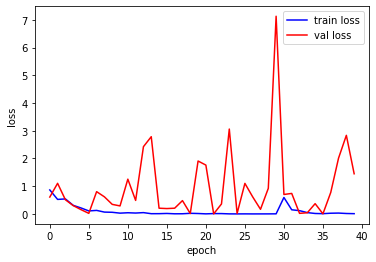

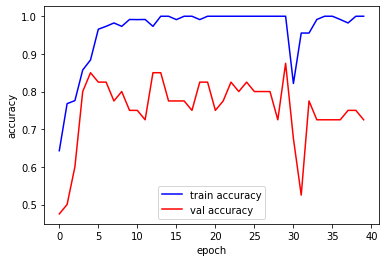

Best Validation Accuracy: 0.7749999761581421
  
Ready for next step!


In [ ]:
# Plotting the loss function

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(hist.history['accuracy'], 'b-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r-', label='val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

print('\033[1m' + "Best Validation Accuracy: " + str(hist.history['val_accuracy'][np.argmin(hist.history['val_loss'])]))
print("  ")

print ('\033[1m' + 'Ready for next step!')

### 2.4 - Performance Metrics

In [ ]:
from keras.models import load_model

# Loading the best model

best_model = load_model('best_SIIM_custom_model.hdf5')

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


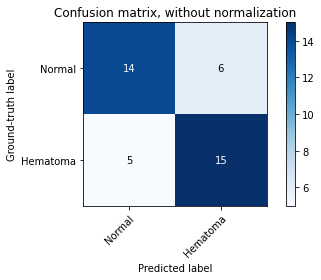

In [ ]:
# Defining a function to plot a confusion matrix.

# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  
X, Y = test_generator.next() # Get the X (images) and Y (labels) of the test set

labels_pred = 1 - best_model.predict(X) #predict the output from X

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

labels_test =  Y==0

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['Normal','Hematoma'], normalize=False,
                      title='Confusion matrix, without normalization')

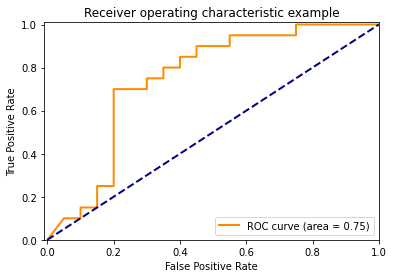

Accuracy: 0.725
F1 Score: 0.7317073170731706


In [ ]:
#Plotting the ROC curve with the AUC

labels_pred = 1 - best_model.predict(X) # predict again to get the original sigmoid output [0,1]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

f1_score = metrics.f1_score(labels_test, labels_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

accuracy = metrics.accuracy_score(labels_test, labels_pred)

print("Accuracy: " + str(accuracy))

print("F1 Score: " + str(f1_score))

##Experiment 3

In [ ]:
#reset runtimes

import os
os.kill(os.getpid(), 9)

### 3.1 - Preprocessing

Using TensorFlow backend.


Data Aug Off
Training set:
Found 66 images belonging to 2 classes.
Validation set:
Found 40 images belonging to 2 classes.
Test set:
Found 40 images belonging to 2 classes.


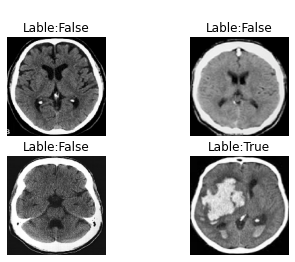

Ready for next step!


In [ ]:
# Importing libraries for arrays (NumPy), Pre-processing (Keras) and plotting images (Matplotlib)

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow


# It is important to set a random seed in order to have reproducbility of training results between different users

from numpy.random import seed
seed(123)
#from tensorflow import set_random_seed
#set_random_seed(123)
tensorflow.random.set_seed(123)

import warnings
warnings.filterwarnings('ignore')

# Dimensions which our images will be resized for the input. All of them must have the same size

img_width, img_height = 150, 150

# We split the data between 60/10/30% for training/validation/test sets 
# We choose which directories must be used

validation_data_dir = '/All cases/Validation/'
nb_validation_samples = 40

test_data_dir = '/All cases/Test/'
nb_test_samples = 40

dataset = 1

if dataset == 0:
  train_data_dir = '/60+6/Training/'
  nb_train_samples = 66
  test_data_dir = '/60+6/Test/'
  nb_test_samples = 40
  validation_data_dir = '/60+6/Validation/'
  nb_validation_samples = 40
elif dataset == 1:
  train_data_dir = '/33+33/Training/'
  nb_train_samples = 66
else:
  train_data_dir = '/All cases/Training/'
  nb_train_samples = 120


# For generator we need to give these two hyperparameters
epochs = 40
batch_size = 5


# This is the augmentation configuration we will use for training
dataaug = 0

if dataaug == 0:
  print("Data Aug Off")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255) # normalization
elif dataaug == 2:
  print("Data Aug ON 2")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=1.0,
      height_shift_range=1.0,
      shear_range=0.2,
      zoom_range=1.0,
      rotation_range=90,
      horizontal_flip=True)  
else:
  print("Data Aug ON 1")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.02,
      zoom_range=0.05, 
      rotation_range=10,
      horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

test_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

print("Training set:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Validation set:")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Test set:")
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary', shuffle = False)

# Let's plot the first 4 generator outputs, defining the positive cases as Label = True and negatives as Label = False 

x,y = train_generator.next()
labley = y==0
for i in range(0, 4):
 plt.subplot(220 + 1 + i).grid(False)
 plt.imshow(x[i], cmap=plt.get_cmap('gray'))
 plt.title("\nLable:{}".format(labley[i]))
 plt.axis('off')

# show the plot
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 3.2 - Transfer Learning

In [ ]:
# We can improve our results using transfer learning

from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

print ('\033[1m' + 'Ready for next step!')

58892288/58889256 [==============================] - 2s 0us/step
Ready for next step!


In [ ]:
# Let's edit the last layers of VGG16 to use it in our solution

from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Only for version 2
x = Dense(1024, activation='relu')(x)

# And a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

SIIM_Net= Model(inputs=base_model.input, outputs=predictions)

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [ ]:
# We can try using a different optimizer as well

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

SIIM_Net.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


### 3.3 - Training and Validation

In [ ]:
# Time to train it

checkpointer = ModelCheckpoint(filepath='Best_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

hist = SIIM_Net.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size,
            callbacks=[checkpointer])

print ('\033[1m' + 'Ready for next step!')

Epoch 1/40
13/13 [==============================] - 7s 546ms/step - loss: 0.7024 - accuracy: 0.5410 - val_loss: 0.7224 - val_accuracy: 0.4750

Epoch 00001: val_loss improved from inf to 0.72238, saving model to Best_model.hdf5
Epoch 2/40
13/13 [==============================] - 2s 170ms/step - loss: 0.6883 - accuracy: 0.4754 - val_loss: 0.6564 - val_accuracy: 0.7000

Epoch 00002: val_loss improved from 0.72238 to 0.65641, saving model to Best_model.hdf5
Epoch 3/40
13/13 [==============================] - 2s 168ms/step - loss: 0.6723 - accuracy: 0.6393 - val_loss: 0.6923 - val_accuracy: 0.5500

Epoch 00003: val_loss did not improve from 0.65641
Epoch 4/40
13/13 [==============================] - 2s 168ms/step - loss: 0.6511 - accuracy: 0.6066 - val_loss: 0.6311 - val_accuracy: 0.5500

Epoch 00004: val_loss improved from 0.65641 to 0.63108, saving model to Best_model.hdf5
Epoch 5/40
13/13 [==============================] - 2s 168ms/step - loss: 0.6636 - accuracy: 0.6393 - val_loss: 0.599

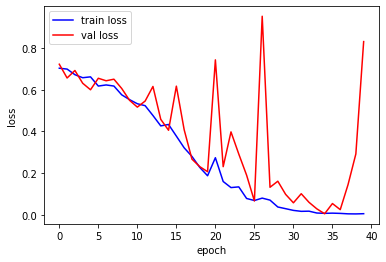

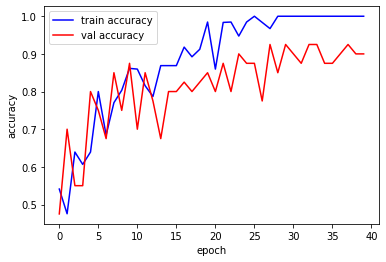

Best Validation Accuracy: 0.875
  
Ready for next step!


In [ ]:
#Plotting the loss function

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(hist.history['accuracy'], 'b-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r-', label='val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

print('\033[1m' + "Best Validation Accuracy: " + str(hist.history['val_accuracy'][np.argmin(hist.history['val_loss'])]))
print("  ")

print ('\033[1m' + 'Ready for next step!')

### 3.4 - Performance Metrics

In [ ]:
from keras.models import load_model

#Loading the best model

best_model = load_model('Best_model.hdf5')

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


Ready for next step!


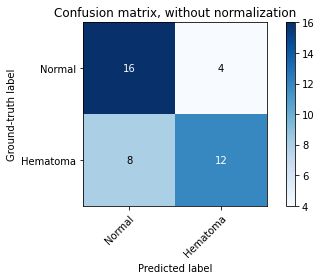

In [ ]:
# Defining a function to plot a confusion matrix.

# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

X, Y = test_generator.next() # Get the X (images) and Y (labels) of the test set

labels_pred = best_model.predict(X) #predict the output from X

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

labels_test = Y

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['Normal','Hematoma'], normalize=False,
                      title='Confusion matrix, without normalization')

print ('\033[1m' + 'Ready for next step!')

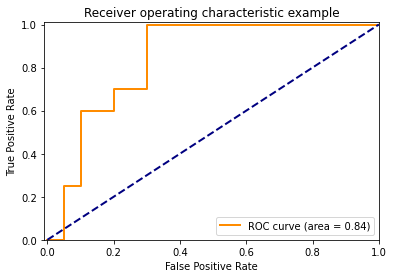

Accuracy: 0.7
F1 Score: 0.6666666666666665
Ready for next step!


In [ ]:
#Plotting the ROC curve with the AUC

labels_pred = best_model.predict(X) # predict again to get the original sigmoid output [0,1]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

f1_score = metrics.f1_score(labels_test, labels_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

accuracy = metrics.accuracy_score(labels_test, labels_pred)

print("Accuracy: " + str(accuracy))

print("F1 Score: " + str(f1_score))

print ('\033[1m' + 'Ready for next step!')

##Experiment 4

In [ ]:
#reset runtimes

import os
os.kill(os.getpid(), 9)

### 4.1 - Preprocessing

Using TensorFlow backend.


Data Aug ON 1
Training set:
Found 66 images belonging to 2 classes.
Validation set:
Found 40 images belonging to 2 classes.
Test set:
Found 40 images belonging to 2 classes.


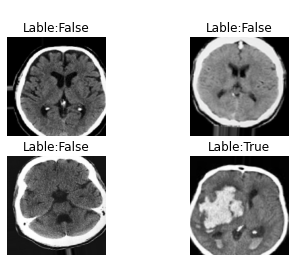

Ready for next step!


In [ ]:
# Importing libraries for arrays (NumPy), Pre-processing (Keras) and plotting images (Matplotlib)

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow

# It is important to set a random seed in order to have reproducbility of training results between different users

from numpy.random import seed
seed(123)
#from tensorflow import set_random_seed
#set_random_seed(123)
tensorflow.random.set_seed(123)

import warnings
warnings.filterwarnings('ignore')

# Dimensions which our images will be resized for the input. All of them must have the same size

img_width, img_height = 150, 150

# We split the data between 60/10/30% for training/validation/test sets 
# We choose which directories must be used

validation_data_dir = '/All cases/Validation/'
nb_validation_samples = 40

test_data_dir = '/All cases/Test/'
nb_test_samples = 40

dataset = 1

if dataset == 0:
  train_data_dir = '/60+6/Training/'
  nb_train_samples = 66
  test_data_dir = '/60+6/Test/'
  nb_test_samples = 40
  validation_data_dir = '/60+6/Validation/'
  nb_validation_samples = 40
elif dataset == 1:
  train_data_dir = '/33+33/Training/'
  nb_train_samples = 66
else:
  train_data_dir = '/All cases/Training/'
  nb_train_samples = 120


# For generator we need to give these two hyperparameters
epochs = 40
batch_size = 5


# This is the augmentation configuration we will use for training
dataaug = 1

if dataaug == 0:
  print("Data Aug Off")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255) # normalization
elif dataaug == 2:
  print("Data Aug ON 2")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=1.0,
      height_shift_range=1.0,
      shear_range=0.2,
      zoom_range=1.0,
      rotation_range=90,
      horizontal_flip=True)  
else:
  print("Data Aug ON 1")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.02,
      zoom_range=0.05, 
      rotation_range=10,
      horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

test_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

print("Training set:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Validation set:")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Test set:")
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary', shuffle = False)

# Let's plot the first 4 generator outputs, defining the positive cases as Label = True and negatives as Label = False 

x,y = train_generator.next()
labley = y==0
for i in range(0, 4):
 plt.subplot(220 + 1 + i).grid(False)
 plt.imshow(x[i], cmap=plt.get_cmap('gray'))
 plt.title("\nLable:{}".format(labley[i]))
 plt.axis('off')

# show the plot
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 4.2 - Transfer Learning

In [ ]:
# We can improve our results using transfer learning

from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [ ]:
# Let's edit the last layers of VGG16 to use it in our solution

from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Only for version 2
x = Dense(1024, activation='relu')(x)

# And a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

SIIM_Net= Model(inputs=base_model.input, outputs=predictions)

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [ ]:
# We can try using a different optimizer as well

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

SIIM_Net.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


### 4.3 - Training and Validation

In [ ]:
# Time to train it

checkpointer = ModelCheckpoint(filepath='Best_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

hist = SIIM_Net.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size,
            callbacks=[checkpointer])

print ('\033[1m' + 'Ready for next step!')

Epoch 1/40
13/13 [==============================] - 7s 558ms/step - loss: 0.7068 - accuracy: 0.5082 - val_loss: 0.6067 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.60674, saving model to Best_model.hdf5
Epoch 2/40
13/13 [==============================] - 2s 174ms/step - loss: 0.6935 - accuracy: 0.5574 - val_loss: 0.6912 - val_accuracy: 0.4250

Epoch 00002: val_loss did not improve from 0.60674
Epoch 3/40
13/13 [==============================] - 2s 171ms/step - loss: 0.6866 - accuracy: 0.4590 - val_loss: 0.7136 - val_accuracy: 0.4750

Epoch 00003: val_loss did not improve from 0.60674
Epoch 4/40
13/13 [==============================] - 2s 181ms/step - loss: 0.6907 - accuracy: 0.5538 - val_loss: 0.6707 - val_accuracy: 0.6250

Epoch 00004: val_loss did not improve from 0.60674
Epoch 5/40
13/13 [==============================] - 2s 164ms/step - loss: 0.6513 - accuracy: 0.6842 - val_loss: 0.6508 - val_accuracy: 0.6250

Epoch 00005: val_loss did not improve from 0.606

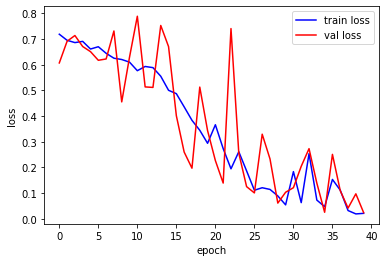

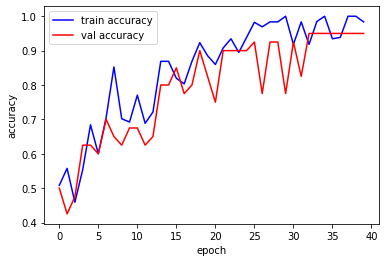

Best Validation Accuracy: 0.949999988079071
  
Ready for next step!


In [ ]:
#Plotting the loss function

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(hist.history['accuracy'], 'b-', label='train accuracy')
plt.plot(hist.history['val_accuracy'], 'r-', label='val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

print('\033[1m' + "Best Validation Accuracy: " + str(hist.history['val_accuracy'][np.argmin(hist.history['val_loss'])]))
print("  ")


print ('\033[1m' + 'Ready for next step!')

### 4.4 - Performance Metrics

In [ ]:
from keras.models import load_model

#Loading the best model

best_model = load_model('Best_model.hdf5')

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


Ready for next step!


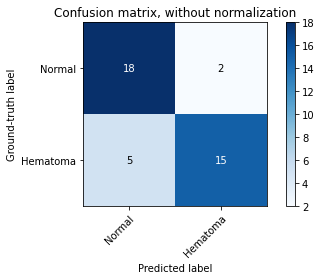

In [ ]:
# Defining a function to plot a confusion matrix.

# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

X, Y = test_generator.next() # Get the X (images) and Y (labels) of the test set

labels_pred = best_model.predict(X) #predict the output from X

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

labels_test = Y

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['Normal','Hematoma'], normalize=False,
                      title='Confusion matrix, without normalization')

print ('\033[1m' + 'Ready for next step!')

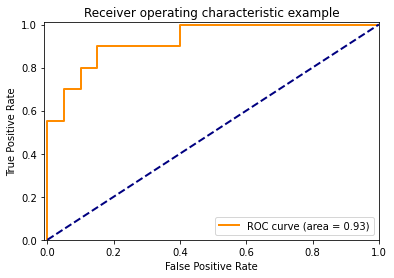

Accuracy: 0.825
F1 Score: 0.8108108108108107
Ready for next step!


In [ ]:
#Plotting the ROC curve with the AUC

labels_pred = best_model.predict(X) # predict again to get the original sigmoid output [0,1]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

f1_score = metrics.f1_score(labels_test, labels_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

accuracy = metrics.accuracy_score(labels_test, labels_pred)

print("Accuracy: " + str(accuracy))

print("F1 Score: " + str(f1_score))

print ('\033[1m' + 'Ready for next step!')

##Experiment 5

In [ ]:
#reset runtimes

import os
os.kill(os.getpid(), 9)

### 5.1 - Preprocessing

Using TensorFlow backend.


Data Aug ON 1
Training set:
Found 120 images belonging to 2 classes.
Validation set:
Found 40 images belonging to 2 classes.
Test set:
Found 40 images belonging to 2 classes.


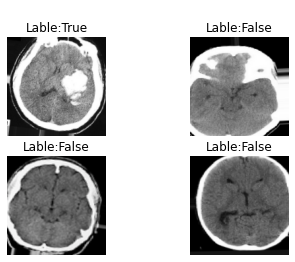

Ready for next step!


In [ ]:
# Importing libraries for arrays (NumPy), Pre-processing (Keras) and plotting images (Matplotlib)

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow

# It is important to set a random seed in order to have reproducbility of training results between different users

from numpy.random import seed
seed(123)
#from tensorflow import set_random_seed
#set_random_seed(123)
tensorflow.random.set_seed(123)

import warnings
warnings.filterwarnings('ignore')

# Dimensions which our images will be resized for the input. All of them must have the same size

img_width, img_height = 150, 150

# We split the data between 60/10/30% for training/validation/test sets 
# We choose which directories must be used

validation_data_dir = '/All cases/Validation/'
nb_validation_samples = 40

test_data_dir = '/All cases/Test/'
nb_test_samples = 40

dataset = 2

if dataset == 0:
  train_data_dir = '/60+6/Training/'
  nb_train_samples = 66
  test_data_dir = '/60+6/Test/'
  nb_test_samples = 40
  validation_data_dir = '/60+6/Validation/'
  nb_validation_samples = 40
elif dataset == 1:
  train_data_dir = '/33+33/Training/'
  nb_train_samples = 66
else:
  train_data_dir = '/All cases/Training/'
  nb_train_samples = 120


# For generator we need to give these two hyperparameters
epochs = 40
batch_size = 5


# This is the augmentation configuration we will use for training
dataaug = 1

if dataaug == 0:
  print("Data Aug Off")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255) # normalization
elif dataaug == 2:
  print("Data Aug ON 2")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=1.0,
      height_shift_range=1.0,
      shear_range=0.2,
      zoom_range=1.0,
      rotation_range=90,
      horizontal_flip=True)  
else:
  print("Data Aug ON 1")
  train_datagen = ImageDataGenerator(
      rescale=1. / 255, # normalization
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.02,
      zoom_range=0.05, 
      rotation_range=10,
      horizontal_flip=True)

# This is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

test_datagen = ImageDataGenerator(rescale=1. / 255) # normalization

print("Training set:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Validation set:")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print("Test set:")
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=nb_test_samples,
    class_mode='binary', shuffle = False)

# Let's plot the first 4 generator outputs, defining the positive cases as Label = True and negatives as Label = False 

x,y = train_generator.next()
labley = y==0
for i in range(0, 4):
 plt.subplot(220 + 1 + i).grid(False)
 plt.imshow(x[i], cmap=plt.get_cmap('gray'))
 plt.title("\nLable:{}".format(labley[i]))
 plt.axis('off')

# show the plot
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 5.2 - Transfer Learning

In [ ]:
# We can improve our results using transfer learning

from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [ ]:
# Let's edit the last layers of VGG16 to use it in our solution

from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Only for version 2
x = Dense(1024, activation='relu')(x)

# And a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

SIIM_Net= Model(inputs=base_model.input, outputs=predictions)

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [ ]:
# We can try using a different optimizer as well

sgd = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

SIIM_Net.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


### 5.3 - Training and Validation

In [ ]:
# Time to train it

checkpointer = ModelCheckpoint(filepath='Best_model.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)

hist = SIIM_Net.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size,
            callbacks=[checkpointer])

print ('\033[1m' + 'Ready for next step!')

Epoch 1/40
24/24 [==============================] - 8s 320ms/step - loss: 0.7031 - accuracy: 0.5250 - val_loss: 0.6697 - val_accuracy: 0.6250

Epoch 00001: val_loss improved from inf to 0.66967, saving model to Best_model.hdf5
Epoch 2/40
24/24 [==============================] - 4s 160ms/step - loss: 0.6739 - accuracy: 0.6333 - val_loss: 0.6350 - val_accuracy: 0.6500

Epoch 00002: val_loss improved from 0.66967 to 0.63499, saving model to Best_model.hdf5
Epoch 3/40
24/24 [==============================] - 4s 161ms/step - loss: 0.6573 - accuracy: 0.6417 - val_loss: 0.6785 - val_accuracy: 0.7250

Epoch 00003: val_loss did not improve from 0.63499
Epoch 4/40
24/24 [==============================] - 4s 161ms/step - loss: 0.6395 - accuracy: 0.7083 - val_loss: 0.6527 - val_accuracy: 0.8250

Epoch 00004: val_loss did not improve from 0.63499
Epoch 5/40
24/24 [==============================] - 4s 161ms/step - loss: 0.6205 - accuracy: 0.7417 - val_loss: 0.6141 - val_accuracy: 0.7750

Epoch 00005

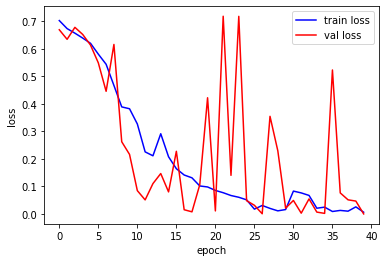

KeyError: ignored

In [ ]:
#Plotting the loss function

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend()
plt.show()


print('\033[1m' + "Best Validation Accuracy: " + str(hist.history['val_acc'][np.argmin(hist.history['val_loss'])]))
print("  ")


print ('\033[1m' + 'Ready for next step!')

### 5.4 - Performance Metrics

In [ ]:
from keras.models import load_model

#Loading the best model

best_model = load_model('Best_model.hdf5')

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


Ready for next step!


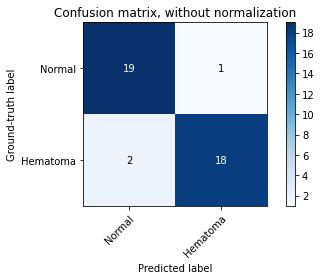

In [ ]:
# Defining a function to plot a confusion matrix.

# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Ground-truth label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

X, Y = test_generator.next() # Get the X (images) and Y (labels) of the test set

labels_pred = best_model.predict(X) #predict the output from X

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

labels_test = Y

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(labels_test, labels_pred.astype('int'), classes=['Normal','Hematoma'], normalize=False,
                      title='Confusion matrix, without normalization')

print ('\033[1m' + 'Ready for next step!')

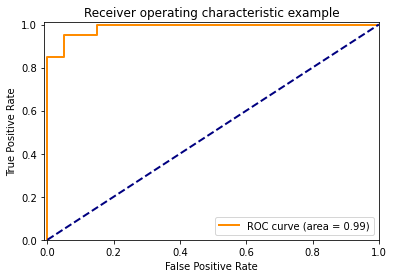

Accuracy: 0.925
F1 Score: 0.9230769230769231
Ready for next step!


In [ ]:
#Plotting the ROC curve with the AUC

labels_pred = best_model.predict(X) # predict again to get the original sigmoid output [0,1]

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(labels_test, labels_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

labels_pred = labels_pred > labels_pred.mean() #predictions greater than mean are set to 1, those lesser than or equal to mean are set to 0.

f1_score = metrics.f1_score(labels_test, labels_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

accuracy = metrics.accuracy_score(labels_test, labels_pred)

print("Accuracy: " + str(accuracy))

print("F1 Score: " + str(f1_score))

print ('\033[1m' + 'Ready for next step!')

### 5.5 - Test Evaluation Transfer Learning

Found 40 images belonging to 2 classes.
Test group accuracy:  0.925000011920929
40/40 [==============================] - 0s 6ms/step


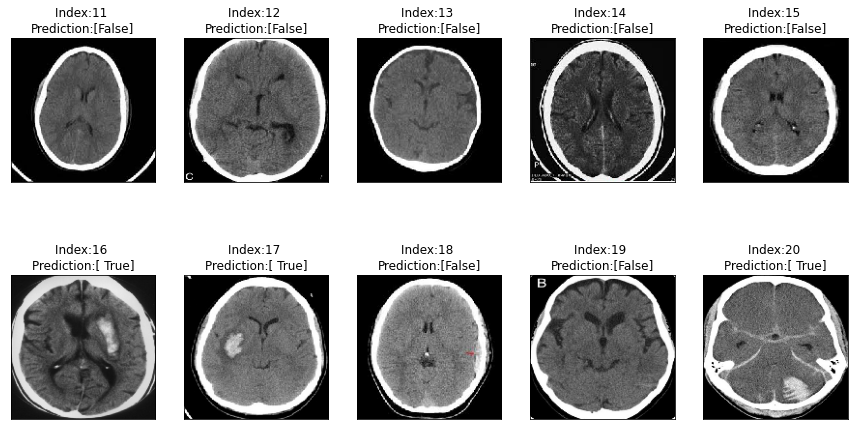

Ready for next step!


In [ ]:
# Finally, we can use the test set for predictions

test_data_dir = '/All cases/Test/' # location of test dataset

test_datagen = ImageDataGenerator(
         rescale=1./255)       # normalize pixel values to [0,1]

# Preparing test set images for prediction

itr = test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=40,
    shuffle='False',
    class_mode='binary')
batch_x, batch_y = itr.next()

print('Test group accuracy: ', best_model.evaluate(batch_x, batch_y, verbose=0)[1])



from random import randrange

prediction1 = np.round(best_model.predict(batch_x, verbose=1))==0


start_idx = randrange(batch_x.shape[0]-10) 
fig, ax = plt.subplots(2,5, figsize=(15,8))
for j in range(0,2): 
  for i in range(0,5):
     ax[j][i].xaxis.set_major_locator(plt.NullLocator())
     ax[j][i].yaxis.set_major_locator(plt.NullLocator())
     ax[j][i].imshow(batch_x[start_idx], cmap='gray')
     ax[j][i].set_title("Index:{} \nPrediction:{}".format(start_idx, prediction1[start_idx]))
     start_idx +=1
plt.show()

print ('\033[1m' + 'Ready for next step!')

### 5.6 - Visualization

In [ ]:
# Importing visualization tools

from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.layers import Input
from keras import activations
from keras.models import load_model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import initializers
from keras.models import Sequential, Model
from vis.visualization import visualize_activation,visualize_saliency,overlay,visualize_cam
from vis.utils import utils

import matplotlib.pyplot as plt
from keras.applications import imagenet_utils
import numpy as np

print ('\033[1m' + 'Ready for next step!')

Ready for next step!


In [ ]:
print(best_model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
layer_idx = utils.find_layer_idx(best_model, 'block5_conv3')
print("Remove Activation from Last Layer")
# Swap softmax with linear
best_model.layers[layer_idx].activation = activations.linear
print("Done. Now Applying changes to the model ...")
activation2_model = utils.apply_modifications(best_model)
print ('\033[1m' + 'Ready for next step!')

Remove Activation from Last Layer
Done. Now Applying changes to the model ...
Ready for next step!


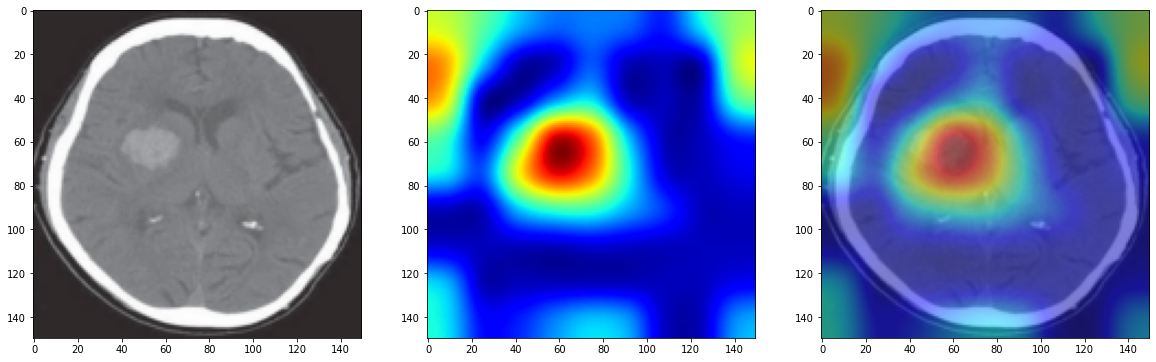

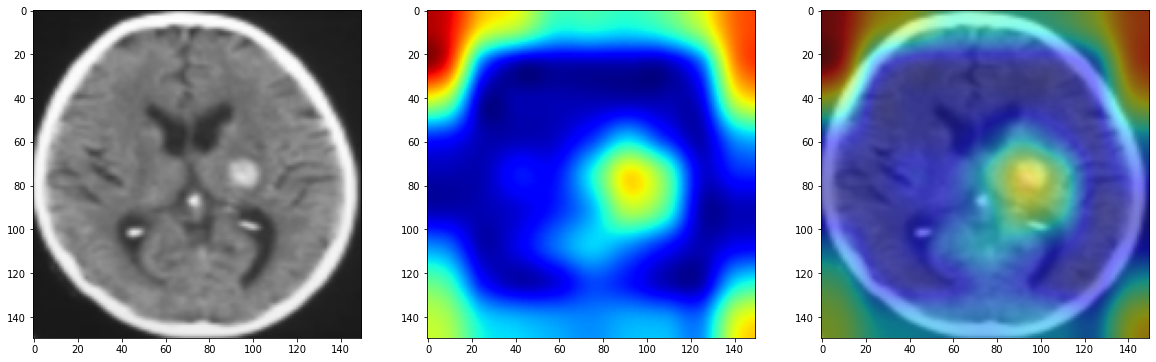

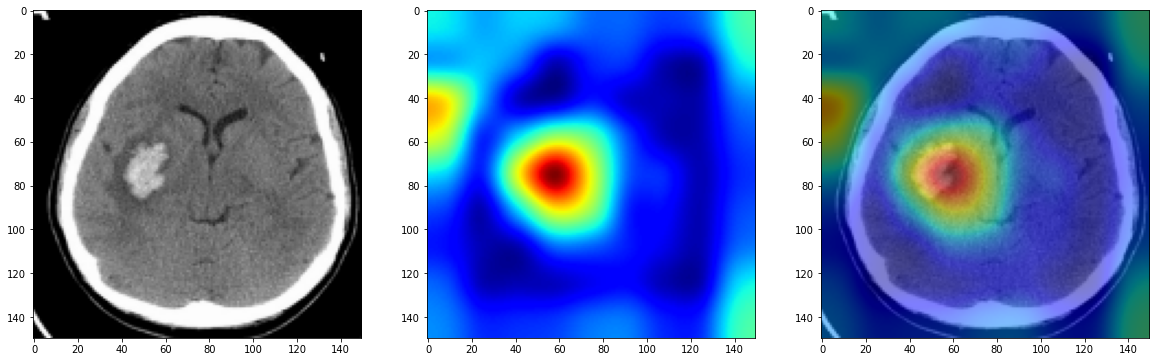


Congratulations, you have completed the assignment!


In [ ]:
#print(activation_model.summary())
#im_files=["/All cases/Test/Hematoma/Test hematoma (1).png","/All cases/Test/Normal/Test_normal (1).png"]
import os
cwd = os.getcwd()
import os

dir_name='/All cases/Test/'
im_files = test_generator.filenames
for im_file in im_files[:3]:
    img1 = image.load_img(dir_name + im_file,target_size=(150,150))
    img1 = image.img_to_array(img1)
    img1 = np.expand_dims(img1, axis=0)
    img1 = preprocess_input(img1)
    layer_idx = utils.find_layer_idx(activation2_model, 'block5_conv3')
    heatmap = visualize_cam(activation2_model, layer_idx, filter_indices=range(activation2_model.layers[layer_idx].filters), seed_input=img1[0,:,:,:])
    img_init=utils.load_img(dir_name + im_file,target_size=(150,150))
    img_init = img_init[:,:,:3]
    plt.figure(figsize=(20,20))
    ax1 = plt.subplot(1,3,1)
    ax1.grid(False)
    plt.imshow(img_init, cmap='gray')
    ax2 = plt.subplot(1,3,2)
    ax2.grid(False)
    plt.imshow(heatmap)
    ax3 = plt.subplot(1,3,3)
    ax3.grid(False)
    plt.imshow(overlay(img_init, heatmap))
    plt.show()
    
print ('\n' + '\033[1m' + 'Congratulations, you have completed the assignment!')

from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/cub3pntkz8muQ/giphy.gif">')